In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sbn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import baseline
import importlib as imp

In [20]:
raw = pd.read_csv('./wine+quality/winequality-red.csv', sep=';')
print(f"Number of samples: {raw.shape[0]}")
print(f"Number of features (discount 1-d target value): {raw.shape[1] - 1}")
print(f"First few rows:")
raw.head()

Number of samples: 1599
Number of features (discount 1-d target value): 11
first few rows


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [55]:
column_names = list(raw.columns)
feature_names = column_names[:-1]
target_name = column_names[-1]
print(f"feature names: {feature_names}")
print(f"target value names: {target_name}")
print(f"\tunique target values: {raw[target_name].unique()}")

feature names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
target value names: quality
	unique target values: [5 6 7 4 8 3]


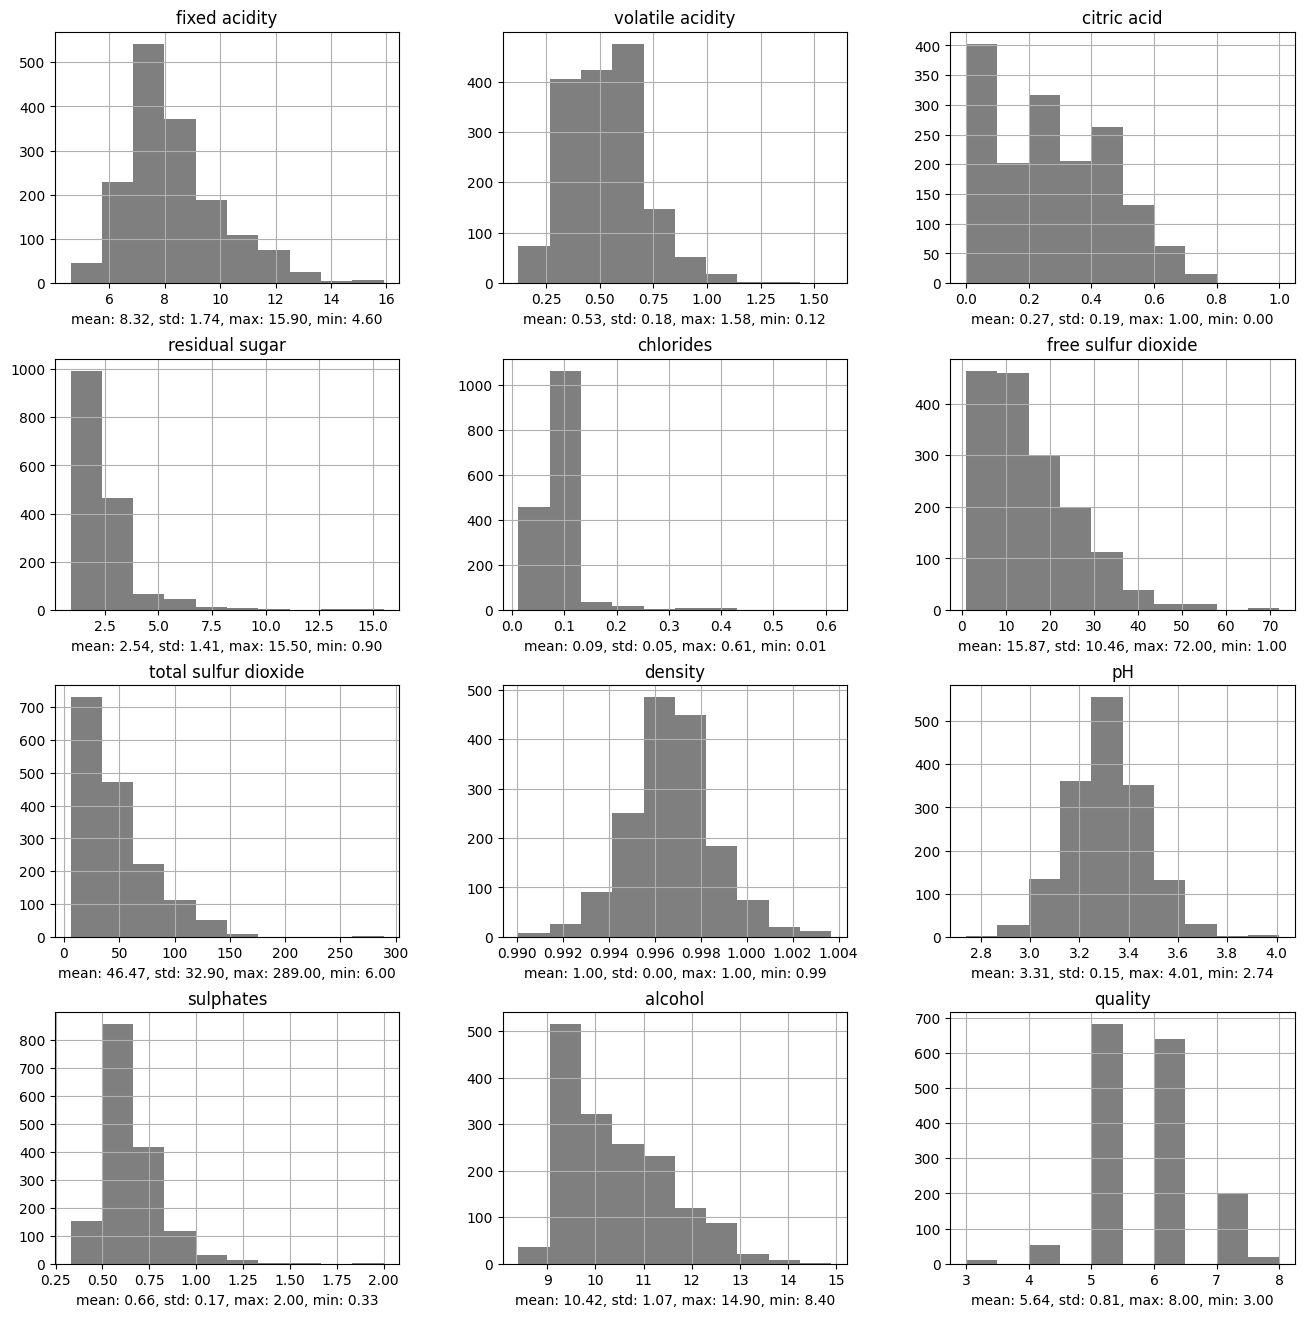

In [60]:
"""Histogram"""
axs = raw.hist(alpha=0.5, figsize=(16, 16), color='black')
for (i, ax) in enumerate(axs.flatten()):
    # print(ax.get_title())
    ax.set_xlabel(f'mean: {raw[ax.get_title()].mean():.2f}, std: {raw[ax.get_title()].std():.2f}, ' +
                  f'max: {raw[ax.get_title()].max():.2f}, min: {raw[ax.get_title()].min():.2f}')

Text(0, 0.5, 'Principal Component #2')

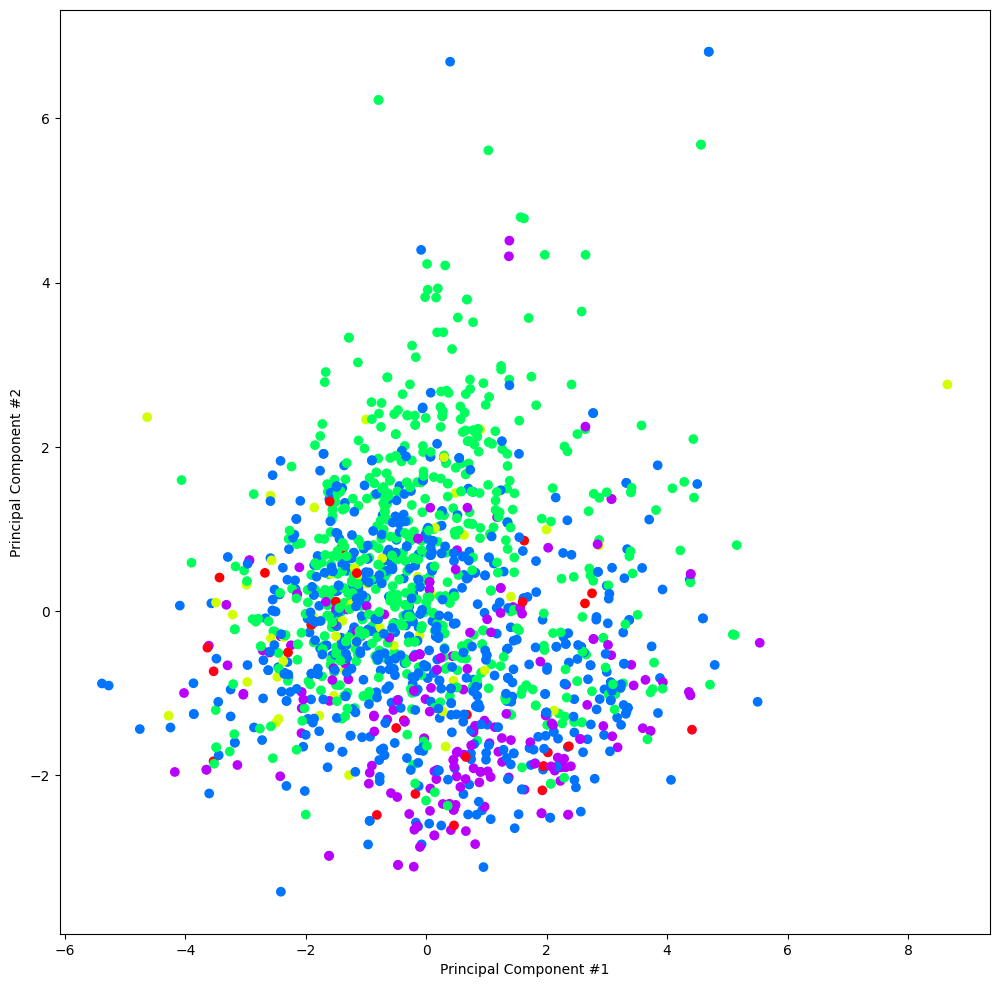

In [66]:
"""Principal Component Analysis"""
principal_component_analyzer = PCA(n_components=2)
pca_data = raw.copy() # to avoid re-loading dataset all the time!
x_component = pca_data[feature_names]
y_component = pca_data[target_name]
pca_pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=2))])
x_pca_transformed = pca_pipeline.fit_transform(x_component)
f, ax = plt.subplots(figsize=(12, 12))
ax.scatter(x_pca_transformed[:, 0], x_pca_transformed[:, 1], c=y_component, cmap='hsv')
ax.set_xlabel('Principal Component #1')
ax.set_ylabel('Principal Component #2')